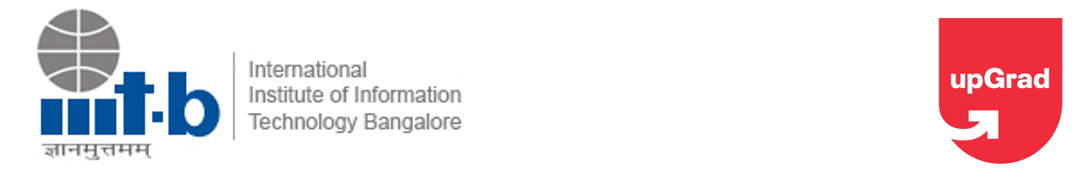
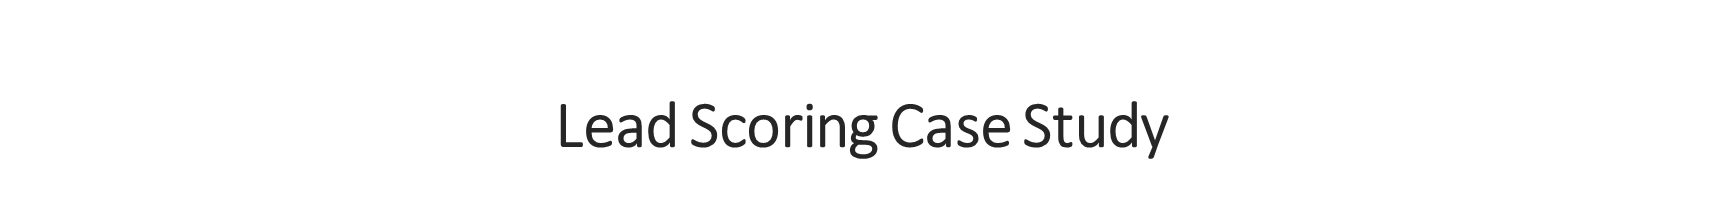
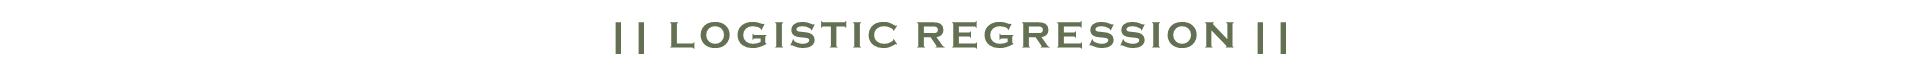
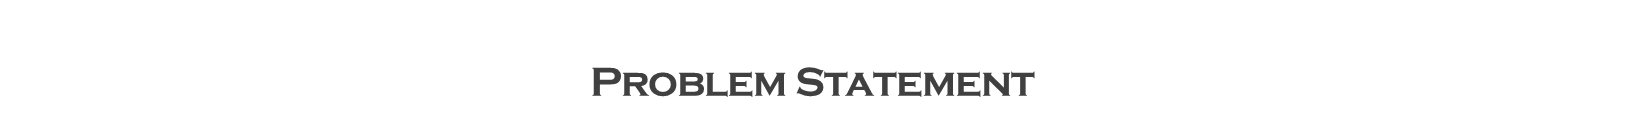
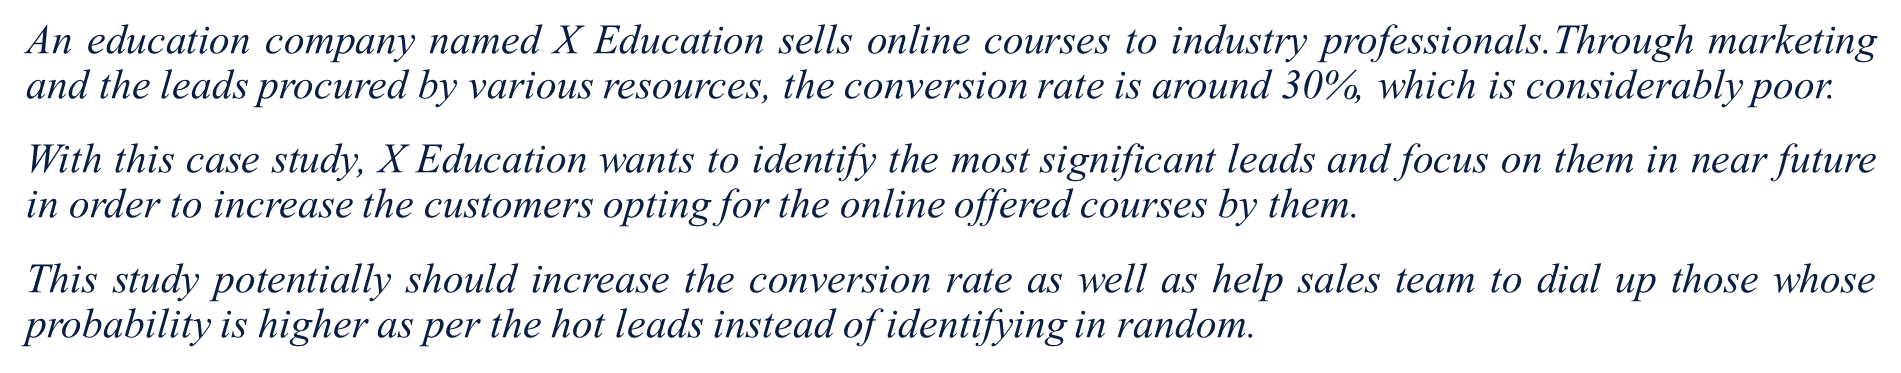
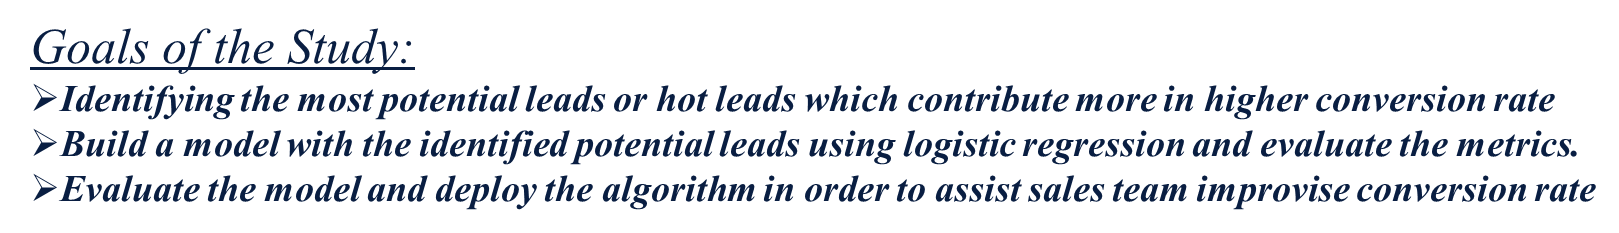

### *(1) Importing the necessary mathematical, visual and statistical support libraries to perform the analysis*

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing style of plot to be used while visualizing the dataset

plt.style.use('ggplot')

# Displaying all the coloums of dataframe while using pandas

pd.set_option("display.max_columns",250)

# Importing sklearn and statsmodel functions necessary to perform logistic regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### *(2) Reading and understanding the Dataset*

In [2]:
# Reading the Leads dataset and understanding the variables

leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the number of rows and columns of the imported dataset before treating the dataset for analysis

num_rows=leads_data.shape[0]
num_cols=leads_data.shape[1]

print("No of rows before data cleaning process: ",num_rows)
print("No of columns before data cleaning process: ",num_cols)

No of rows before data cleaning process:  9240
No of columns before data cleaning process:  37


In [4]:
# checking the statistical summaries of numerical variables present in dataset

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking the data types and total count in each of the variable of loaded dataset

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### With above check its clear that, there is significant difference of count amongst the variables in dataset. Lets treat it step by step.

### *(3) Data Cleaning*

*It is observed in previous stage of understanding the dataset step that, during the data collection some of the information are left by default with **'Select'** as a value which are actually the null values. Let's start the data cleaning process by replacing all the default selections with null values*.

In [6]:
# casing the 'Select' values to unified alphabetical lower format

leads_data = leads_data.applymap(lambda s:s.lower() if type(s) == str else s)

# replacing 'select' values with NaN values

leads_data=leads_data.replace('select',np.nan)

*Next, let us identify the percentage of null values in each of the columns in the dataset.*

In [7]:
# defining a function to calculate null value percentage in a dataset

def nullValuePer(df):
    null_perc_series=round((df.isnull().mean()*100),2).sort_values(ascending=False)
    nullPerc=pd.DataFrame({'Column_Name':null_perc_series.index,'Percentage':null_perc_series.values})
    return nullPerc

# null value percentage (>0) in columns 

null_per=nullValuePer(leads_data)
null_per[null_per['Percentage']>0]

,Column_Name,Percentage
0,How did you hear about X Education,78.46
1,Lead Profile,74.19
2,Lead Quality,51.59
3,Asymmetrique Profile Score,45.65
4,Asymmetrique Activity Score,45.65
5,Asymmetrique Activity Index,45.65
6,Asymmetrique Profile Index,45.65
7,City,39.71
8,Specialization,36.58
9,Tags,36.29


*That's a quite a good amount of null values in dataset, which could have troubled and highly affected the analysis. Let us drop the columns with 35% null values straight away*

In [8]:
# Removing all the columns that have 35% null values (retaining specialization, as its a important factor for analysis)

leads_data = leads_data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City'],axis=1)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# null value percentage (>0) in columns 

null_per=nullValuePer(leads_data)
null_per[null_per['Percentage']>0]

,Column_Name,Percentage
0,Specialization,36.58
1,What matters most to you in choosing a course,29.32
2,What is your current occupation,29.11
3,Country,26.63
4,TotalVisits,1.48
5,Page Views Per Visit,1.48
6,Last Activity,1.11
7,Lead Source,0.39


*Let us fill the null values in **Specialization, What matters most to you in choosing a course** and **What is your current occupation**, as they are the most important factors to understand the behaviour of a student enrolling into the course*

In [10]:
leads_data['Specialization'] = leads_data['Specialization'].fillna('Unknown')
print(leads_data['Specialization'].value_counts(),'\n\n\n')

leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].fillna('Unknown')
print(leads_data['What matters most to you in choosing a course'].value_counts(),'\n\n\n')

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('Unknown')
print(leads_data['What is your current occupation'].value_counts())

Unknown                              3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64 



better career prospects      6528
Unknown                      2709
flexibility & convenience       2
other                           1
Name: What matters most to 

*Let us now check for percentage of null values row wise and eliminate anything above 70%.*

In [11]:
# checking percentage of null values in rows

print("Row wise - Maximum percentage of null values: ",max(round(leads_data.isnull().sum(axis=1)*100/len(leads_data.columns),2)))

Row wise - Maximum percentage of null values:  17.86


*Checking the values of country variable*

In [12]:
leads_data.Country.value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [13]:
print("Percentage of Students from India is:",max(leads_data.Country.value_counts())/num_rows*100)

Percentage of Students from India is: 70.25974025974025


*Dropping the variable **Country** as maximun enrolled students are from India and doesn't impact analysis on this grounds*

In [14]:
leads_data.drop('Country',axis=1,inplace=True)

# null value percentage (>0) in columns 

null_per=nullValuePer(leads_data)
null_per[null_per['Percentage']>0]

,Column_Name,Percentage
0,TotalVisits,1.48
1,Page Views Per Visit,1.48
2,Last Activity,1.11
3,Lead Source,0.39


*Dropping the rows of the above variables to eliminate the null values in dataset as the percentage is less than 5%*

In [15]:
leads_data = leads_data[leads_data.isnull().sum(axis=1) <1]

# final check for null value percentage (>0) in columns 

null_per=nullValuePer(leads_data)
null_per

,Column_Name,Percentage
0,Prospect ID,0.0
1,Search,0.0
2,A free copy of Mastering The Interview,0.0
3,I agree to pay the amount through cheque,0.0
4,Get updates on DM Content,0.0
5,Update me on Supply Chain Content,0.0
6,Receive More Updates About Our Courses,0.0
7,Through Recommendations,0.0
8,Digital Advertisement,0.0
9,Newspaper,0.0


*Perfect, we have reached the stage of data cleaning with no null values in our dataset loaded for analysis. Let us now move forward and check for number of unique categories in each categorical columns*

In [16]:
# Checking the number of unique categories in each categorical column

leads_data.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

*As per above results, we can drop the variables with only one unique categorical valued variable such as* **Magazine, I agree to pay the amount through cheque, Get updates on DM Content, Update me on Supply Chain Content, Receive More Updates About Our Courses**

In [17]:
# Dropping unique valued columns

leads_data= leads_data.drop(['Magazine','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'],axis=1)
leads_data.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

*Alright, now we have atleast 2 unique categories in all the categorical variables listed above. But if you observe **Prospect ID and lead number**, they have all the values unique and hence doesn't contribute for analysis. Hence dropping them in next step.*

In [18]:
# dropping Prospect ID and Lead number from dataset as all the values are unique.

leads_data = leads_data.drop(['Prospect ID','Lead Number'],1)
leads_data.shape

(9074, 20)

*As of now, we have covered all the necessary checks in data cleaning process and the action for each step has been taken to treat the data. Finally, let us check the data retained after the treatment.*

In [19]:
print("Percentage of data retained for analysis after cleaning process: ",round(leads_data.shape[0]*100/num_rows,2))

Percentage of data retained for analysis after cleaning process:  98.2


*Quick overview of categorical variables before proceeding to Exploratory data analysis*

In [20]:
# To familiarize all the categorical values

for column in leads_data.columns:
    print('\033[94m'+"\033[1m"+"Column Name: ",column+' (%)'+'\033[0m')
    print(round(leads_data[column].astype('category').value_counts(normalize=True)*100,2))
    print('----------------------------------------------------------------------------------------')

Column Name:  Lead Origin (%)
landing page submission    53.84
api                        39.43
lead add form               6.40
lead import                 0.33
Name: Lead Origin, dtype: float64
----------------------------------------------------------------------------------------
Column Name:  Lead Source (%)
google               31.66
direct traffic       28.03
olark chat           19.32
organic search       12.72
reference             4.88
welingak website      1.42
referral sites        1.38
facebook              0.34
bing                  0.07
click2call            0.04
live chat             0.02
press_release         0.02
social media          0.02
welearn               0.01
welearnblog_home      0.01
pay per click ads     0.01
testone               0.01
blog                  0.01
nc_edm                0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64
----------------------------------------------------------------------------------------
Column Name:  Do Not E

In [21]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

In [22]:
print("No of rows after data cleaning process: ",leads_data.shape[0])
print("No of columns after data cleaning process: ",leads_data.shape[1])

No of rows after data cleaning process:  9074
No of columns after data cleaning process:  20


### *(4) Exploratory Data Analysis (EDA)*

*To get started with EDA, let us first check the target variable and data distribution in it with a **countplot** from seaborn library*

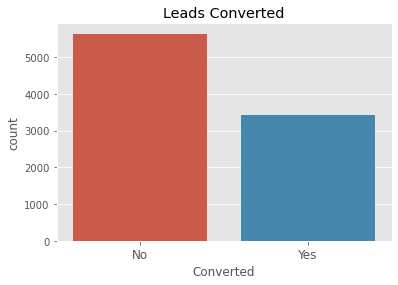

In [23]:
sns.countplot(leads_data['Converted'])
plt.title('Leads Converted')
plt.xticks(ticks=[0,1],labels=['No','Yes'],fontsize=12)
plt.show()

In [24]:
#to calculate percentage values of converted and non-converted 
print('Percentage of Conversion: ',round(leads_data[leads_data['Converted']==1].shape[0]*100/leads_data.shape[0],2))
print('Percentage of Non-Conversion: ',round(leads_data[leads_data['Converted']==0].shape[0]*100/leads_data.shape[0],2))

Percentage of Conversion:  37.86
Percentage of Non-Conversion:  62.14


### Inference: 
*The dataset is not highly imbalanced and hence meaningful insights can be drawn from it with respect to target variable.*





*Let us now split the columns of dataset into numerical and categorical variables based on which univariate analysis an be performed*

##### Numerical Variables

In [25]:
#Numerical variables
num_vars=leads_data._get_numeric_data().columns
list(num_vars)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

***'TotalVisits','Total Time Spent on Website','Page Views Per Visit'*** are the numerical variables whereas ***Converted*** is target variable in dataset

##### Categorical Variables

In [26]:
cat_vars=list(set(leads_data.columns) - set(num_vars))
list(cat_vars)

['Specialization',
 'What matters most to you in choosing a course',
 'Lead Origin',
 'A free copy of Mastering The Interview',
 'Lead Source',
 'Digital Advertisement',
 'Newspaper Article',
 'X Education Forums',
 'Last Activity',
 'Do Not Email',
 'Newspaper',
 'What is your current occupation',
 'Search',
 'Last Notable Activity',
 'Through Recommendations',
 'Do Not Call']

##### Countplots from Seaborn library are plotted below against categorical variables and insights are recorded right after.

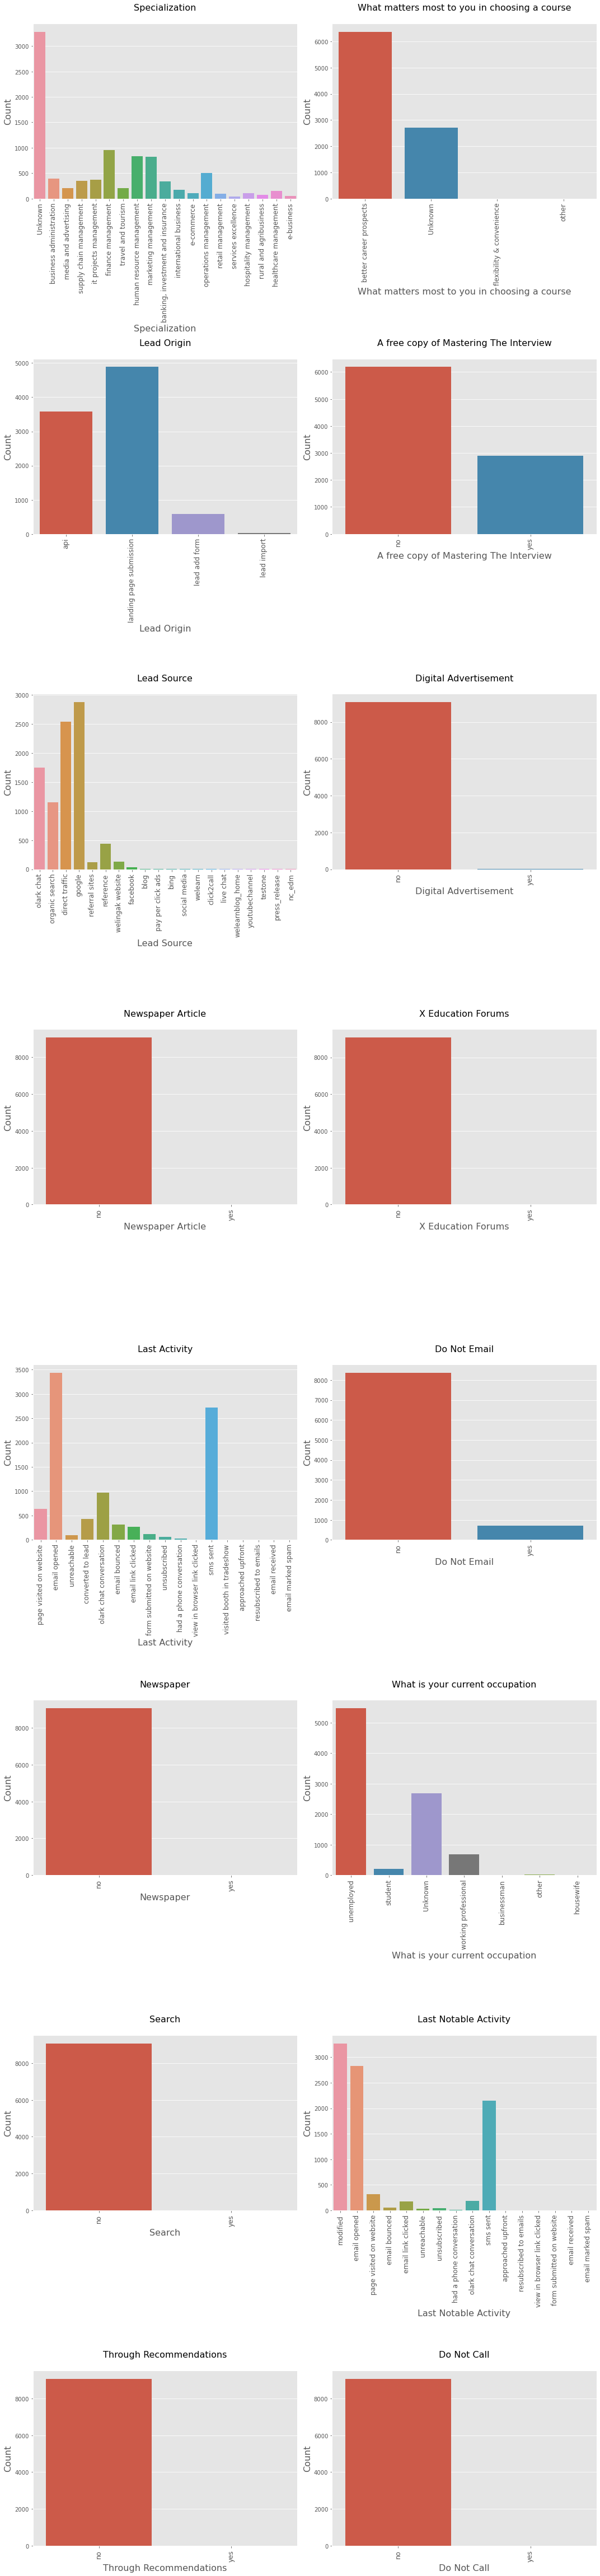

In [27]:
plt.figure(figsize = (15,80))

for col in cat_vars:
    plt.subplot(10,2,cat_vars.index(col)+1)
    sns.countplot(leads_data[col])
    plt.xticks(fontsize=12,rotation=90)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.title(col+'\n',fontsize=16)
    plt.tight_layout();

### Inferences:

*1. There has been no significant conversions over **Recommendations, newspapers article** and **digital advertisements** including **X education forums**.*

*2. Most of the customers have enrolled to course after **SMS sent** or **Email being read** by them as per the latest activity.*

*3. One third of the customers have indicated that he/she wants a **free copy of 'Mastering the Interview'**.*

*4. **Google, organic search** along with **direct traffic** has been a main source of lead for customers.*

*5. The major motto which has been mattered to most of the customers in choosing this course is **better career prospects**.*

*6. **Landing page submission** is a major lead origin to identify the customer to be a lead.*

***Below plots shows the distribution of data in categorical variables with respect to the converted leads and non-converted***

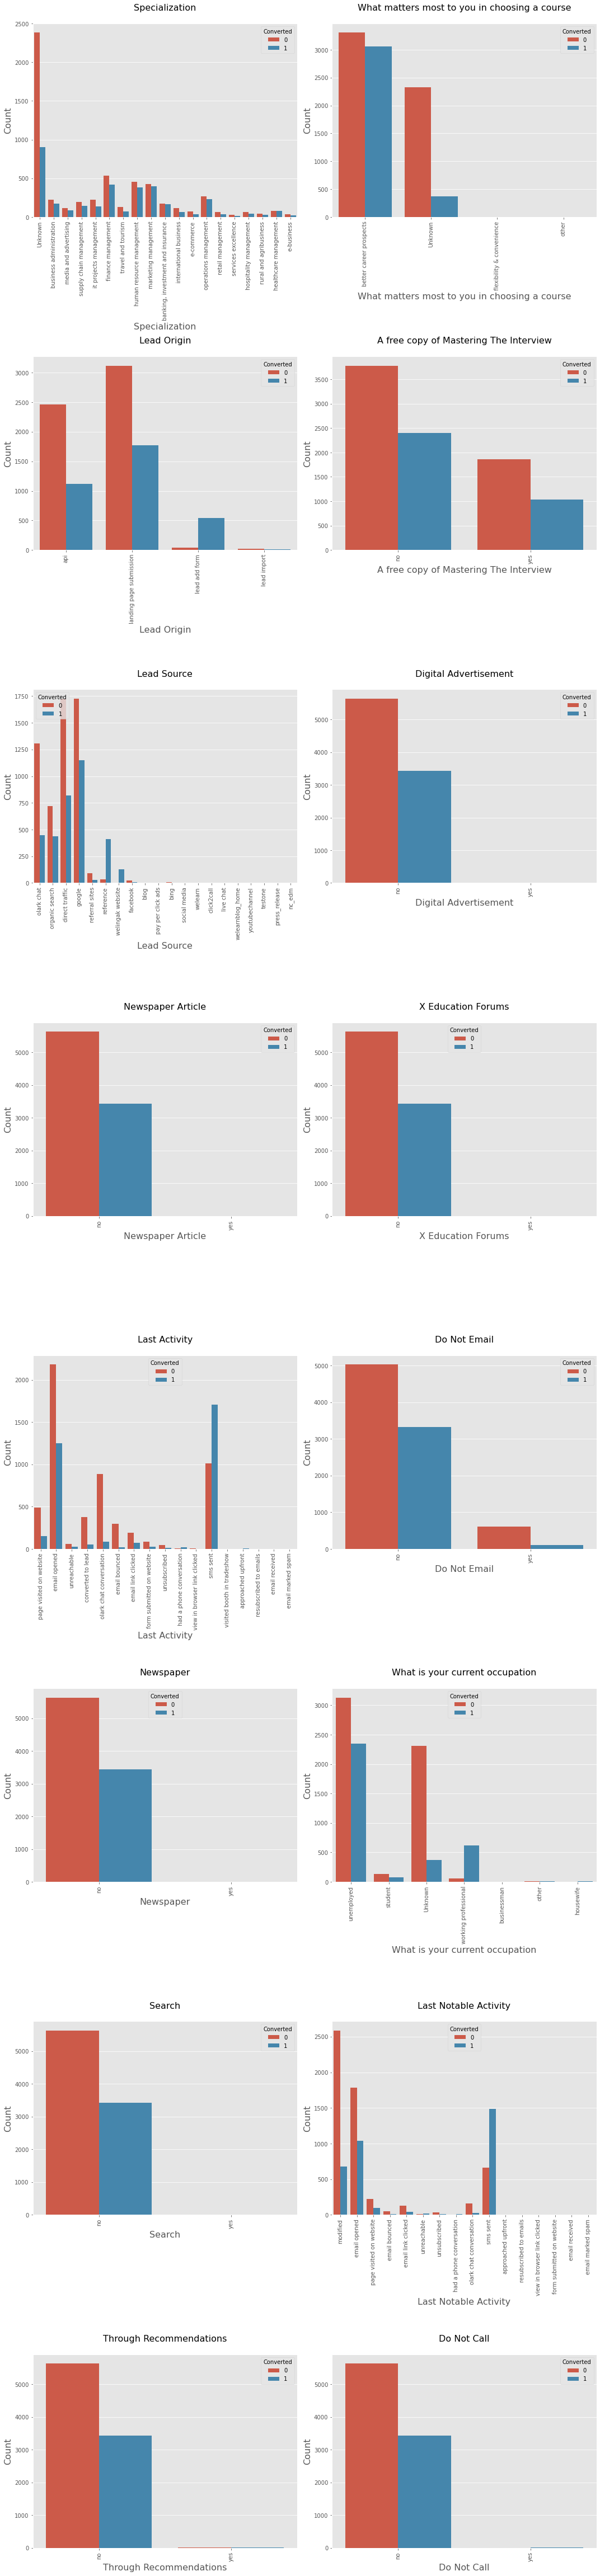

In [28]:
plt.figure(figsize = (15,80))

for col in cat_vars:
    plt.subplot(10,2,cat_vars.index(col)+1)
    sns.countplot(x=col, hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.title(col+'\n',fontsize=16)
    plt.tight_layout();

##### Histograms from Matplotlib library are plotted below against numerical variables with respect to target variable and insights are recorded right after.

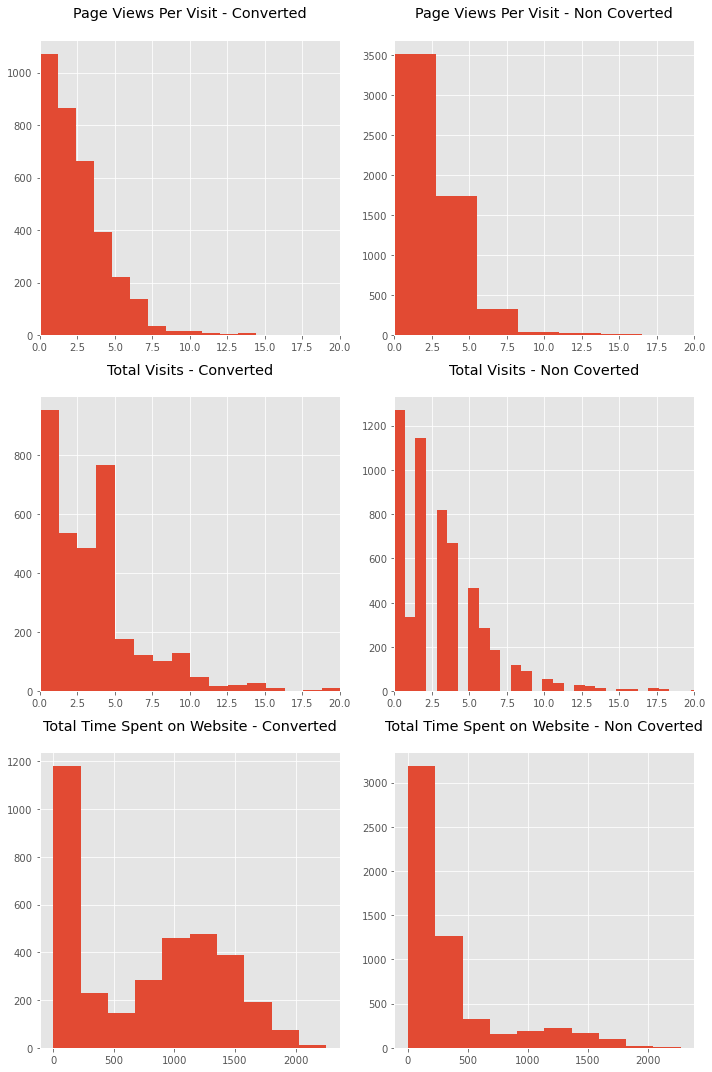

In [29]:
plt.figure(figsize = (10,15))
plt.subplot(3,2,1)
plt.hist(leads_data[leads_data['Converted']==1]['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit - Converted\n')
plt.xlim(0,20)

plt.subplot(3,2,2)
plt.hist(leads_data[leads_data['Converted']==0]['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit - Non Coverted\n')
plt.xlim(0,20)


plt.subplot(3,2,3)
plt.hist(leads_data[leads_data['Converted']==1]['TotalVisits'], bins = 200)
plt.title('Total Visits - Converted\n')
plt.xlim(0,20)

plt.subplot(3,2,4)
plt.hist(leads_data[leads_data['Converted']==0]['TotalVisits'], bins = 200)
plt.title('Total Visits - Non Coverted\n')
plt.xlim(0,20)

plt.subplot(3,2,5)
plt.hist(leads_data[leads_data['Converted']==1]['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website - Converted\n')

plt.subplot(3,2,6)
plt.hist(leads_data[leads_data['Converted']==0]['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website - Non Coverted\n')

plt.tight_layout();


### Inferences:

*1. It is recommended to make website more interactive in order to ensure customers spend more time to convert. It is observed that leads spending more time on website are at higher chances of conversion.*


*2. Advertisements to be increased for visitors in order to ensure they engage in website more time and more likely to convert as average visit time for both converted and non-converted are same.*


*3. Average number of pages on the website viewed during the visits is very less for the converted as well as non-converted, it is advised to minimize the pages and increase effective content on home page.*

### *(5) Creation of Dummy Variables*

In [30]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Specialization                                 9074 

In [31]:
num_vars = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_vars.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [32]:
cat_vars=list(set(leads_data.columns) - set(num_vars))
cat_vars

['Specialization',
 'What matters most to you in choosing a course',
 'Lead Origin',
 'A free copy of Mastering The Interview',
 'Lead Source',
 'Digital Advertisement',
 'Newspaper Article',
 'X Education Forums',
 'Converted',
 'Last Activity',
 'Do Not Email',
 'Newspaper',
 'What is your current occupation',
 'Search',
 'Last Notable Activity',
 'Through Recommendations',
 'Do Not Call']

In [33]:
# Creating the dummy variables using the 'get_dummies' function and drop first column of each variable 
# excluding converted as its a target variable

dummies = pd.get_dummies(leads_data[
['Through Recommendations',
 'Newspaper Article',
 'Lead Source',
 'Newspaper',
 'What matters most to you in choosing a course',
 'Last Activity',
 'X Education Forums',
 'Search',
 'Digital Advertisement',
 'Specialization',
 'A free copy of Mastering The Interview',
 'Do Not Email',
 'What is your current occupation',
 'Do Not Call',
 'Last Notable Activity',
 'Lead Origin']], drop_first=True)

# Adding the results to the master dataframe

leads_data_final = pd.concat([leads_data, dummies], axis=1)
leads_data_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Through Recommendations_yes,Newspaper Article_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Newspaper_yes,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,X Education Forums_yes,Search_yes,Digital Advertisement_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,A free copy of Mastering The Interview_yes,Do Not Email_yes,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Do Not Call_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,Unknown,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,Unknown,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,land

In [34]:
# checking the shape of dataframe after creation of dummies

leads_data_final.shape

(9074, 109)

In [35]:
# drop the main variables as dummies created for each of the unique count in them

leads_data_final.drop(
['Through Recommendations',
 'Newspaper Article',
 'Lead Source',
 'Newspaper',
 'What matters most to you in choosing a course',
 'Last Activity',
 'X Education Forums',
 'Search',
 'Digital Advertisement',
 'Specialization',
 'A free copy of Mastering The Interview',
 'Do Not Email',
 'What is your current occupation',
 'Do Not Call',
 'Last Notable Activity',
 'Lead Origin'],axis=1,inplace=True)

# checking the final shape of dataset after dropping the main variables

leads_data_final.shape

(9074, 93)

In [36]:
leads_data_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations_yes,Newspaper Article_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Newspaper_yes,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,X Education Forums_yes,Search_yes,Digital Advertisement_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,A free copy of Mastering The Interview_yes,Do Not Email_yes,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Do Not Call_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [37]:
# columns pairs in order of highest absolute correlation

leads_data_final.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(30)

Converted                                       Converted                                                                1.000000
Lead Source_facebook                            Lead Origin_lead import                                                  0.983684
Last Notable Activity_unsubscribed              Last Activity_unsubscribed                                               0.872656
Lead Origin_lead add form                       Lead Source_reference                                                    0.866191
Last Notable Activity_email opened              Last Activity_email opened                                               0.861636
Last Notable Activity_sms sent                  Last Activity_sms sent                                                   0.853102
What is your current occupation_unemployed      What matters most to you in choosing a course_better career prospects    0.802298
Last Activity_email link clicked                Last Notable Activity_email link clicked  

##### let us proceed and drop the highest co-related variables in further process using RFE method of elimination of variables

### *(6) Test Train Split*

In [38]:
# Putting the target variable in y

y = leads_data_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# creating a variable X by dropping target variable from dataset

X = leads_data_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations_yes,Newspaper Article_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Newspaper_yes,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,X Education Forums_yes,Search_yes,Digital Advertisement_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,A free copy of Mastering The Interview_yes,Do Not Email_yes,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Do Not Call_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [40]:
# Splitting the dataset into 70% train data and 30% test data for building the model using train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
# Scaling the numerical variables using the MinMaxScaler function

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations_yes,Newspaper Article_yes,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Newspaper_yes,What matters most to you in choosing a course_better career prospects,What matters most to you in choosing a course_flexibility & convenience,What matters most to you in choosing a course_other,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,X Education Forums_yes,Search_yes,Digital Advertisement_yes,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,A free copy of Mastering The Interview_yes,Do Not Email_yes,What is your current occupation_businessman,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Do Not Call_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import
3009,0.007968,0.178347,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1012,0.007968,0.085355,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7987,0.019920,0.711590,0.104167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

### *(7) Building the model using logistic regression technique*

In [42]:
# creating a logistic regression and assigning it to a variable

logreg = LogisticRegression()

In [43]:
# using RFE method of variable elimination to count of 15

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [44]:
# list of variables with its RFE ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Through Recommendations_yes', False, 61),
 ('Newspaper Article_yes', False, 23),
 ('Lead Source_blog', False, 57),
 ('Lead Source_click2call', False, 45),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 53),
 ('Lead Source_google', False, 2),
 ('Lead Source_live chat', False, 56),
 ('Lead Source_nc_edm', False, 21),
 ('Lead Source_olark chat', False, 22),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 54),
 ('Lead Source_press_release', False, 71),
 ('Lead Source_reference', False, 15),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 47),
 ('Lead Source_testone', False, 51),
 ('Lead Source_welearn', False, 77),
 ('Lead Source_welearnblog_home', False, 60),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', False, 65),
 ('Newspaper_yes', False, 6),
 ('What matt

In [45]:
# loading all the variables selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [46]:
# loading the training variable of X with the columns selected by RFE

X_train = X_train[col]

### *Model 1*

In [47]:
# fitting the model with the features selected in training variables of x

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# creating a VIF dataframe for all the features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.2
Date:                Sat, 15 Jan 2022   Deviance:                       5288.4
Time:                        18:49:07   Pearson chi2:                 6.06e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

*As per the summary above, **'What is your current occupation_housewife'** has a high p value of **0.999**. Hence dropping and proceeding ahead with remaining features.*

In [48]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

### *Model 2*

In [49]:
# fitting the model with the features remaining after the elimination of What is your current occupation_housewife

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# creating a VIF dataframe for all the features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.7
Date:                Sat, 15 Jan 2022   Deviance:                       5297.5
Time:                        18:49:08   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

*As per the p-values and VIF table above, it seems **TotalVisits** variable showing higher p-value, lets try eliminating other less important features to improvise its p-value. However VIF seems safe for all.*

In [50]:
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

### Model 3

In [51]:
# fitting the model with the features remaining after the elimination of Lead Source_welingak website

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.1
Date:                Sat, 15 Jan 2022   Deviance:                       5308.3
Time:                        18:49:08   Pearson chi2:                 6.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

*let's try again with the same logic of less important feature elimination*

In [52]:
X_train.drop('What matters most to you in choosing a course_better career prospects', axis = 1, inplace = True)

In [53]:
# re fitting the model with the features remaining after the elimination of Lead Source_welingak website

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Sat, 15 Jan 2022   Deviance:                       5541.9
Time:                        18:49:08   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

*This seems to be pretty good model as we have all the p-values and VIFs in an acceptable limit of 0.05 and 5% respectively. Lets stick to it !!*

### *(8) Prediction*

In [54]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.145039
1012    0.275646
9226    0.371827
4750    0.785066
7987    0.844830
1281    0.780635
2880    0.140955
4971    0.905538
7536    0.743624
1248    0.817982
dtype: float64

In [55]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14503912, 0.27564634, 0.37182727, 0.78506566, 0.84482991,
       0.78063526, 0.14095547, 0.90553797, 0.7436242 , 0.81798205])

In [56]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.145039
1,0,0.275646
2,0,0.371827
3,1,0.785066
4,1,0.844830


In [57]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.145039,0
1,0,0.275646,0
2,0,0.371827,0
3,1,0.785066,1
4,1,0.844830,1


### *(9) Evaluation of Model*

In [58]:
# Creating the confusion matrix on train data

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3453,  452],
       [ 861, 1585]], dtype=int64)

In [59]:
# Predicted     not_churn    churn
# Actual
# not_churn        3453       452
# churn             861      1585

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [60]:
# Check the overall evaluation metrices

print('1. Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.793260903794678 

2. Sensitivity : 0.6479967293540474 

3. Specificity : 0.8842509603072983


### *(10) Optimizing the Cut off using ROC Curve*

In [61]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [62]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

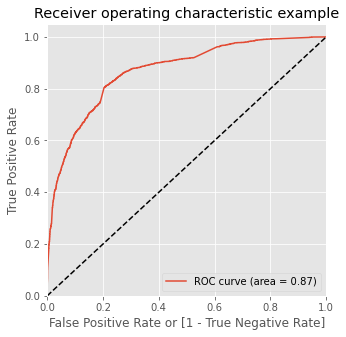

In [63]:
# calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

*ROC curve value of 0.87 is good number to proceed*

In [64]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.145039,0,1,1,0,0,0,0,0,0,0,0
1,0,0.275646,0,1,1,1,0,0,0,0,0,0,0
2,0,0.371827,0,1,1,1,1,0,0,0,0,0,0
3,1,0.785066,1,1,1,1,1,1,1,1,1,0,0
4,1,0.844830,1,1,1,1,1,1,1,1,1,1,0


In [65]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.553141     0.980785     0.285275
0.2          0.2  0.734215     0.892069     0.635339
0.3          0.3  0.783971     0.847097     0.744430
0.4          0.4  0.790112     0.729354     0.828169
0.5          0.5  0.793261     0.647997     0.884251
0.6          0.6  0.786490     0.569501     0.922407
0.7          0.7  0.774209     0.495503     0.948784
0.8          0.8  0.755157     0.409240     0.971831
0.9          0.9  0.697843     0.230172     0.990781


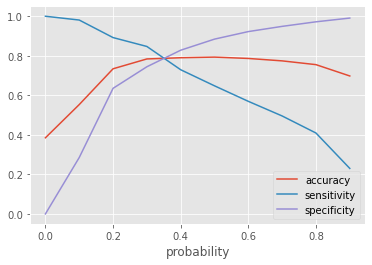

In [66]:
# Plotting it
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

*With above plot, let us take 0.35 as cutt off and see the results of evalution metrics*

In [67]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.145039,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.275646,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.371827,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.785066,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.844830,1,1,1,1,1,1,1,1,1,1,0,1


In [68]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3048,  857],
       [ 449, 1997]], dtype=int64)

In [69]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [70]:
# Checking the values of evalation metrices

print('1. Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.793260903794678 

2. Sensitivity : 0.8164349959116926 

3. Specificity : 0.7805377720870679


*It can be observed that there is increase in Sensitivity from 64.7% to 81.6 with change in cutt off from 0.5 to o.35 using ROC curve optimization technique. Let us now proceed and predict the test data using the features of train dataset*

### *(11) Prediction on test set*

In [71]:
# Scaling the numerical variables

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [72]:
# Substituting all the columns in the final train model

col = X_train.columns

# Select the columns in X_train for X_test as well

X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_organic search,Lead Source_referral sites,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,Do Not Email_yes,What is your current occupation_working professional,Last Notable Activity_unreachable,Lead Origin_lead add form
3271,1.0,0.015936,0.070530,0,0,0,0,0,0,0,0,0,0
1490,1.0,0.019920,0.679695,1,0,0,0,0,0,0,1,0,0
7936,1.0,0.007968,0.033243,0,0,0,0,0,0,0,0,0,0
4216,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1
3830,1.0,0.031873,0.073675,0,1,0,0,0,0,0,0,0,0


In [73]:
# Storing the prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting y_test_pred to dataframe
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [74]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.178915
1,1,0.950798
2,0,0.154998
3,1,0.860768
4,0,0.121583


In [75]:
# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.178915
1,1,0.950798
2,0,0.154998
3,1,0.860768
4,0,0.121583


In [76]:
# Making prediction using cut off 0.35 which is a optimized cutt off value

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.178915,0
1,1,0.950798,1
2,0,0.154998,0
3,1,0.860768,1
4,0,0.121583,0


In [77]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1368,  366],
       [ 201,  788]], dtype=int64)

In [78]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [79]:
# Check the evaluation metrices

print('1. Accuracy :',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),'\n')
print('2. Sensitivity :',TP/(TP+FN),'\n')
print('3. Specificity :',TN/(TN+FP))

1. Accuracy : 0.7917737789203085 

2. Sensitivity : 0.7967644084934277 

3. Specificity : 0.7889273356401384


### *(12) Precision-Recall Values*

In [80]:
# Creating confusion matrix on training dataset to calculate precision and recall

confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion4


array([[3453,  452],
       [ 861, 1585]], dtype=int64)

In [81]:
# Substituting the value of true positive
TP = confusion4[1,1]
# Substituting the value of true negatives
TN = confusion4[0,0]
# Substituting the value of false positives
FP = confusion4[0,1] 
# Substituting the value of false negatives
FN = confusion4[1,0]

In [82]:
# Check the precision and recall on training data

print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('Precision:',TP / (TP + FP))
print('Recall:',TP / (TP + FN))

Accuracy: 0.793260903794678
Precision: 0.7781050564555719
Recall: 0.6479967293540474


### *(12.1) Precision and recall tradeoff*

In [83]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [84]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

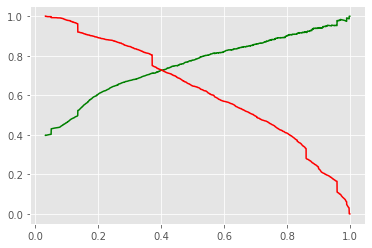

In [85]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

*As per the above results, 0.40 is the cutt off value to optimize the results*

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.145039,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.275646,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.371827,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.785066,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.844830,1,1,1,1,1,1,1,1,1,1,0,1


In [87]:
# Creating confusion matrix again
confusion5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion5

array([[3234,  671],
       [ 662, 1784]], dtype=int64)

In [88]:
# Substituting the value of true positive
TP = confusion5[1,1]
# Substituting the value of true negatives
TN = confusion5[0,0]
# Substituting the value of false positives
FP = confusion5[0,1] 
# Substituting the value of false negatives
FN = confusion5[1,0]

In [89]:
# Check the precision and recall on training data

print('Accuracy:',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))
print('Precision:',TP / (TP + FP))
print('Recall:',TP / (TP + FN))

Accuracy: 0.793260903794678
Precision: 0.7266802443991853
Recall: 0.7293540474243663


*As you can observe above, values are optimized and calculated after plotting the Precision-Recall Curve*

### *(12.2) Prediction on test set*

In [90]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [91]:
# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.178915
1,1,0.950798
2,0,0.154998
3,1,0.860768
4,0,0.121583


In [92]:
# Making prediction on testing data using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: round((x*100),0))
y_pred_final

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.178915,0,18.0
1,1,0.950798,1,95.0
2,0,0.154998,0,15.0
3,1,0.860768,1,86.0
4,0,0.121583,0,12.0
...,...,...,...,...
2718,0,0.414439,1,41.0
2719,0,0.313576,0,31.0
2720,1,0.784345,1,78.0
2721,0,0.174740,0,17.0


In [93]:
# Creating confusion matrix for the predicted values of test data

confusion6 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion6

array([[1457,  277],
       [ 291,  698]], dtype=int64)

In [94]:
# Substituting the value of true positive
TP = confusion6[1,1]
# Substituting the value of true negatives
TN = confusion6[0,0]
# Substituting the value of false positives
FP = confusion6[0,1] 
# Substituting the value of false negatives
FN = confusion6[1,0]

In [95]:
# Checking the precision and recall on test data

print('Accuracy:',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('Precision:',TP / (TP + FP))
print('Recall:',TP / (TP + FN))

Accuracy: 0.7914065369078223
Precision: 0.7158974358974359
Recall: 0.7057633973710818


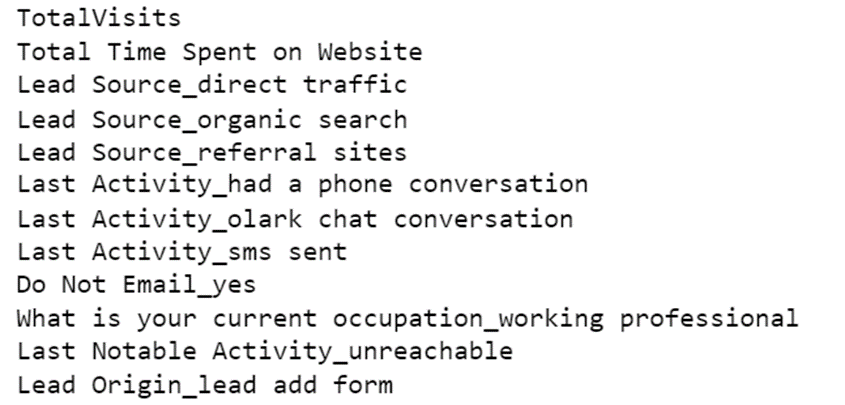

### *(13) Conclusion*

*It is recommended to focus on the listed features above in order to improvise the conversion rate. Some of the insights are listed below*

- *Total **time spent on website** and total **visits to website** plays a vital role, as more the customer checks the website and spend time, more the chances of enrolling to course.*


- *Source for the leads to look after are **Direct traffic, organic search** and **referral sites**, which has higher probability as per model to enroll the customer.*


- *Next, **Phone conversation, olark chat conversation, SMS sent** are notable amongst the last activites which can possibly lead to conversion of customer to enroll into course*


- *Last but not the least, Customers who are **working professionals** are the hot leads for enrolling into the course*